In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen("https://news.naver.com/main/ranking/popularDay.nhn")
bsObject = BeautifulSoup(html, "html.parser")

for link in bsObject.find_all('a'):
    print(link.text.strip(), link.get('href'))

메인 메뉴로 바로가기 #lnb
본문으로 바로가기 #main_content
NAVER https://www.naver.com/
뉴스 /
 https://entertain.naver.com/home
 https://sports.news.naver.com
 https://newsstand.naver.com
 https://weather.naver.com
뉴스홈 /main/home.nhn
속보 /main/list.nhn?mode=LSD&mid=sec&sid1=001
정치 /main/main.nhn?mode=LSD&mid=shm&sid1=100
경제 /main/main.nhn?mode=LSD&mid=shm&sid1=101
사회 /main/main.nhn?mode=LSD&mid=shm&sid1=102
생활/문화 /main/main.nhn?mode=LSD&mid=shm&sid1=103
세계 /main/main.nhn?mode=LSD&mid=shm&sid1=104
IT/과학 /main/main.nhn?mode=LSD&mid=shm&sid1=105
오피니언 /main/opinion/home.nhn
포토 /main/photo/index.nhn?mid=pho
TV /main/tv/index.nhn?mid=tvh
랭킹뉴스 선택됨 /main/ranking/popularDay.nhn?mid=etc&sid1=111
주한미군 한국인 초유의 4월 무급휴직 현실화되나…정부, … https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=025&aid=0002979662
안철수 "지역구 후보 안낸다"…사실상 '선거연대' 수용 https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=100&oid=015&aid=0004298502
문대통령 "중국발 입국금지 실효성 없어"…황교안 "그래도… https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&si

In [ ]:
html = urlopen("https://news.naver.com/main/ranking/popularDay.nhn")
bsObject = BeautifulSoup(html, "html.parser")

for link in bsObject.find_all('a'):
    print(link.text.strip(), link.get('href'))

In [34]:
res = requests.get(htt)
soup = BeautifulSoup(res.content, 'html.parser')
body = soup.select('._article_body_contents')[0]
text = body.get_text() # for p in body.find_all('div'))
text2.insert(-1,text)

In [1]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

import numpy as np
from PIL import Image
from ckonlpy.tag import Twitter
text2 = []
http = []


In [2]:
# 네이버 헤드라인 가져오는소스
httz = 'https://news.naver.com'
res = requests.get(httz)
soup = BeautifulSoup(res.content, 'html.parser')
body = soup.select('#today_main_news > div.hdline_news > ul')
body = body[0].find_all('a')
for i in range(len(body)):
    t = body[i].get('href')
    http.append(t)

In [3]:

# 헤드라인중 링크소스만 뽑아서 다시 들어가서 텍스트만 뽑아옴
for i in range(len(http)):
    res = requests.get(httz + http[i])
    soup = BeautifulSoup(res.content, 'html.parser')
    body = soup.select('._article_body_contents')
    for t in body:
        text = t.get_text() # for p in body.find_all('div'))
        text2.insert(-1,text)



In [4]:
# 사전만들기
from ckonlpy.tag import Twitter
t = Twitter()
t.add_dictionary(['트와이스', 'kf94','KF94','Kf94','kF94','타임라인','확진자','예방수칙','코로나19','corona19','Corona19',
                 '개소리','판매','제품','쿠팡','kf94마스크','KF94마스크','Kf94마스크','kF94마스크',
                 '우한폐렴','신종코로나','신종코로나바이러스','coronavirus','Coronavirus','사재기',
                 '복지부장관', '바이러스', '피해복구', '이만희', '문재인', '이재갑','한림대',
                 '감염내과', '교수님', '정치인', '입국금지','대변인', '청와대','문대통령','황기자'], 'Noun')

C:\Users\82105\Anaconda3\envs\Testing\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [5]:
import nltk
import numpy as np
tokens_ko = []

for i in range(len(text2)):
    tokens_ko.append(t.nouns(text2[i]))

In [6]:
final = []
for _,q in enumerate(tokens_ko):
    for i in range(len(q)):
        final.insert(-1,q[i])

In [7]:
ko = nltk.Text(final, name="첫번째")
data = ko.vocab().most_common(1000)

In [12]:
import time
date = time.strftime('%Y%m%d', time.localtime(time.time()))

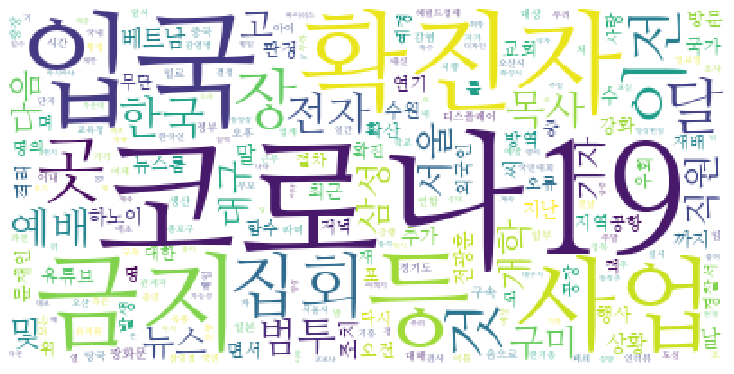

In [27]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from konlpy.tag import Twitter
import numpy as np
from PIL import Image

tmp_data = dict(data)

wordcloud = WordCloud( font_path = '/Library/Fonts/NanumMyeongjo.ttf',
                       background_color='white',max_words=230).generate_from_frequencies(tmp_data)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig("img/naver/naver_{}.png".format(date),bbox_inces='tight',dpi=400,pad_inches=0)
plt.show()